# Market Basket Analysis

## Pengantar

Anda mungkin sering mendengar mengenai bagaimana banyak bisnis berkembang dan maju dengan cepat karena inovasi, baik itu inovasi di sisi produk ataupun bisnis.

Salah satu inovasi bisnis di bidang ritel adalah mencari asosiasi atau hubungan antar produk dari data transaksi penjualan yang bertujuan untuk:

- dipaketkan dan dijual bersamaan.
- memberikan rekomendasi produk kepada seseorang.
- menyusun rak display.
- menyusun halaman produk e-commerce.

Semua hal ini bertujuan untuk meningkatkan penjualan sekaligus memecahkan masalah inventory – karena produk yang tidak begitu laku jika dipasangkan dengan tepat akan lebih menarik dan punya kemungkinan besar dibeli dalam satu paket. Proses ini merupakan proses analisa yang disebut dengan Market Basket Analysis (MBA). 


<video controls src="Belajar Data Science_ Yuk kenal Market Basket Analysis.mp4" />

## Tujuan dari Market Basket Analysis

Dari video pengantar sebelumnya, kita dapat ambil kesimpulan bahwa Market Basket Analysis bertujuan untuk mencari rekomendasi paket produk - berdasarkan pola unik dari data transaksi pelanggan - yang dapat meningkatkan penjualan.

Lalu apa yang bisa kita lakukan dengan rekomendasi paket ini? Dari video tersebut kita bisa melakukan hal seperti menyusun tampilan produk pada website e-commerce atau susunan produk pada rak toko. 

<img src='a.png'>

## Contoh Code Market Basket Analysis di R

Penerapan Market Basket Analysis (MBA) di R dapat menggunakan algoritma **apriori** – yang merupakan salah satu algoritma terpopuler di area machine learning - pada package **arules**. **Arules** sendiri adalah singkatan dari **association rules** - kategori machine learning. Untuk menjalankan algoritma ini diperlukan dibutukan dua data, yaitu data produk dan data transaksi.

Berikut adalah contoh code di R yang jika dijalankan akan memunculkan contoh data transaksinya seperti berikut.

         items                      transactionID
    [1]  {Pet Food,Sirup,Teh Celup} #01          
    [2]  {Gula,Teh Celup}           #02          
    [3]  {Pet Food,Sirup}           #03          
    [4]  {Sirup,Teh Celup}          #04          
    [5]  {Gula,Sirup,Teh Celup}     #05          
    [6]  {Pet Food,Teh Celup}       #06          
    [7]  {Pet Food,Sirup,Teh Celup} #07          
    [8]  {Teh Celup}                #08          
    [9]  {Gula,Teh Celup}           #09          
    [10] {Gula,Pet Food,Sirup}      #10

Dan hasil pemaketan produk yang disarankan terlihat seperti berikut .

        lhs                     rhs        support confidence lift    
    [1] {Pet Food}           => {Sirup}    0.4     0.8000000  1.333333
    [2] {Sirup}              => {Pet Food} 0.4     0.6666667  1.333333
    [3] {Gula,Pet Food}      => {Sirup}    0.1     1.0000000  1.666667
    [4] {Pet Food,Teh Celup} => {Sirup}    0.2     0.6666667  1.111111 

Hasil pada baris pertama dan kedua menunjukkan produk "Pet Food" cocok dipasangkan dengan "Sirup". Lebih detilnya mengenai hasil ini akan dijelaskan pada bab-bab berikutnya.

In [1]:
install.packages("arules")

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpYXv7wq\downloaded_packages


## Kesimpulan

**Market Basket Analysis (MBA)** adalah teknik analisa yang digunakan oleh bisnis di bidang ritel untuk mencari asosiasi produk yang kuat, atau dengan kata lain menemukan paket produk yang bisa berdampak besar pada penjualan.

Algoritma yang bisa digunakan di R untuk melakukan MBA ini adalah **apriori** dari package **arules**. Data yang diperlukan hanya dua, yaitu data transaksi dan data produk.

Dengan paket produk yang ditemukan, bisnis dapat melakukan beberapa hal berikut:

- Membuat paket produk dengan penawaran menarik.
- Menyusun produk dengan asosiasi kuat secara berdampingan pada rak toko.
- Menyusun tampilan katalog website e-commerce.
- Memberikan rekomendasi produk.

# Algoritma Apriori

## Algoritma Apriori dan Association Rules

Bicara mengenai pemaketan produk sebenarnya adalah mencari produk-produk yang memiliki hubungan atau asosiasi kuat di dalam transaksi. Hubungan "kuat" disini akan dilihat berdasarkan proporsi jumlah kemunculan kombinasi produk yang akan dipaketkan dengan keseluruhan transaksi.

Mari kita lihat contoh pada gambar berikut. Nomor transaksi (1 s/d 5) menunjukkan nomor struk belanja. Sedangkan gambar buah yang berwarna menunjukkan produk atau item yang dibeli.

<img src='aa.jpg'>

Pada gambar terlihat ada dua transaksi dimana terdapat buah rambutan dan pisang. Dan dimana terdapat pisang maka ada rambutan, dan sebaliknya. Ini menunjukkan hubungan atau asosiasi yang kuat diantara dua produk buah ini.

Apel sendiri terdapat di seluruh transaksi, sehingga ada atau tidak ada produk buah lain tidak menjadi "masalah" buat Apel. Istilahnya, untuk laku maka Apel jual mahal... tidak memerlukan apapun jadi pendampingnya. Bisa dikatakan, tidak ada asosiasi antara apel dengan produk apapun. Jeruk, apel dan rambutan ada dua kali muncul, tapi jeruk bisa muncul sendirian juga bersama apel. Sehingga kombinasi paket jeruk, apel dan rambutan walaupun ada asosiasi tapi tidak sekuat apel dan rambutan.

Nah, terlihat kan ada kombinasi-kombinasi yang perlu diperiksa? Untuk 4 item dari contoh transaksi kita, dengan minimal 2 item per transaksi maka ada 9 kombinasi yang perlu dicek. Dengan makin banyaknya item maka kombinasi juga akan berkembang cepat.

Sebagai gambaran buat Anda, jika terdapat 1.000 item, maka kemungkinan terdapat jutaan kombinasi yang harus diproses. Jumlah sebesar ini tentunya tidak bisa manual dan butuh bantuan algoritma komputer untuk memprosesnya.

Dan algoritma yang bisa kita gunakan adalah algoritma **apriori** yang merupakan algoritma di kategori **association rules** pada literatur machine learning. Algoritma ini akan menghasilkan kombinasi-kombinasi yang kemudian disusun dalam bentuk rule "Jika membeli ini.... maka akan juga membeli... ".

Ada cukup banyak penerapan dari association rules , seperti di dunia cyber security untuk mendeteksi intrusi jaringan, di bidang sales marketing untuk pemaketan produk, mencari pola pemakaian web, dan lain-lain.

## Menampilkan Kombinasi dari Contoh Transaksi "Kecil"

Dari subbab "Contoh Code Market Basket Analysis di R" pada bab satu kita telah melihat isi file dengan 10 transaksi yang terdapat pada file kita. Disini, DQLab akan mencantumkan hasilnya seperti terlihat di bawah ini.

         items                      transactionID
    [1]  {Pet Food,Sirup,Teh Celup} #01          
    [2]  {Gula,Teh Celup}           #02          
    [3]  {Pet Food,Sirup}           #03          
    [4]  {Sirup,Teh Celup}          #04          
    [5]  {Gula,Sirup,Teh Celup}     #05          
    [6]  {Pet Food,Teh Celup}       #06          
    [7]  {Pet Food,Sirup,Teh Celup} #07          
    [8]  {Teh Celup}                #08          
    [9]  {Gula,Teh Celup}           #09          
    [10] {Gula,Pet Food,Sirup}      #10

Nah, untuk mendapatkan gambaran berapa kombinasi produk yang mungkin terjadi cobalah jalankan code berikut sehingga Anda akan melihat hasil sebagai berikut.

        items                      support
    [1] {Gula,Pet Food}            0.1    
    [2] {Gula,Sirup}               0.2    
    [3] {Gula,Teh Celup}           0.3    
    [4] {Pet Food,Sirup}           0.4    
    [5] {Pet Food,Teh Celup}       0.3    
    [6] {Sirup,Teh Celup}          0.4    
    [7] {Gula,Pet Food,Sirup}      0.1    
    [8] {Gula,Sirup,Teh Celup}     0.1    
    [9] {Pet Food,Sirup,Teh Celup} 0.2 

Terlihat ada sembilan kombinasi produk dengan nilai support adalah rasio dari kombinasi tersebut terhadap keseluruhan transaksi.

Sebagai contoh, kombinasi {Pet Food, Sirup} memiliki support 0.4 yang artinya kombinasi ini terdapat di 4 dari 10 transaksi yang tercatat.

In [2]:
#Menggunakan library arules
library(arules)

#Membaca transaksi dari file data_transaksi.txt
transaksi <- read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

#Menampilkan jumlah kombinasi dari produk yang terdapat pada daftar transaksi yang ada
inspect(apriori(transaksi, parameter = list(support=.1, minlen=2, target='frequent itemsets')))


Warning message:
"package 'arules' was built under R version 3.6.2"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [9 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    items                      support count
[1] {Gula,Pet Food}            0.1     1    
[2] {Gula,Sirup}               0.2     2    
[3] {Gula,Teh Celup}           0.3     3    
[4] {Pet Food,Sirup}           0.4     4    
[5] {Pet Food,Teh Celup}       0.3     3    
[6]

## Menampilkan Kombinasi dari Transaksi "Besar"

Setelah pada subbab sebelumnya kita melihat kombinasi dari transaksi yang hanya berjumlah 10. Pada praktek kali ini, kita akan membaca file dimana di dalamnya terdapat 100 transaksi - yang jika ditampilkan sebagian hasilnya akan terlihat sebagai berikut. Ini lebih mencerminkan transaksi pada dunia nyata - yang jumlah transaksinya bahkan bisa sampai jutaan - dibandingkan dengan contoh sebelumnya.

```
       items                              transactionID
[1]    {Baju Kaos Olahraga,                            
        Baju Renang Pria Dewasa,                       
        Baju Renang Wanita Dewasa,                     
        Celana Jogger Casual,                          
        Dompet Card Holder,                            
        Kaos,                                          
        Sepatu Sport merk Z,                           
        Serum Vitamin,                                 
        Shampo Biasa}                             #1   
[2]    {Baju Batik Wanita,                             
        Baju Kemeja Putih,                             
        Celana Jogger Casual,                          
        Celana Pendek Jeans,                           
        Dompet Card Holder,                            
        Dompet STNK Gantungan,                         
        Flat Shoes Ballerina,                          
        Hair Dryer,                                    
        Jeans Jumbo,                                   
        Kaos,                                          
        Wedges Hitam}                             #10  
[3]    {Baju Renang Wanita Dewasa,                     
        Celana Jogger Casual,                          
        Dompet Card Holder,                            
        Dompet Flip Cover,                             
        Hair Dryer,                                    
        Hair Tonic,                                    
        Sepatu Sandal Anak,                            
        Sepatu Sport merk Y,                           
        Sepatu Sport merk Z,                           
        Shampo Biasa,                                  
        Tali Pinggang Anak}                       #100 
...
[999]  {Baju Batik Wanita,                             
        Baju Kaos Anak - Superheroes,                  
        Blouse Denim,                                  
        Dompet Flip Cover,                             
        Hair Dryer,                                    
        Kuas Makeup ,                                  
        Sepatu Sandal Anak,                            
        Serum Vitamin,                                 
        Sunblock Cream,                                
        Tali Pinggang Gesper Pria,                     
        Tas Pinggang Wanita,                           
        Tas Travel}                               #998 
[1000] {Baju Batik Wanita,                             
        Baju Kaos Anak - Karakter Kartun,              
        Celana Pendek Jeans,                           
        Celana Tactical ,                              
        Cover Koper,                                   
        Tank Top,                                      
        Tas Tangan}                               #999 
        
```

Keseluruhan transaksi ini merupakan kombinasi dari 70 item produk. Dan kalau kita analisa dengan syarat support 0.03 (minimal muncul 30 kali dari 1000 transaksi) maka jumlah kombinasi yang dihasilkan adalah 1248. Semakin kecil support yang kita masukkan akan semakin banyak kombinasi yang muncul.

```
       items                              support
[1]    {Shampo Biasa,                            
        Tas Makeup}                         0.031
[2]    {Tank Top,                                
        Tas Tangan}                         0.032
[3]    {Celana Pendek Jeans,                     
        Tas Tangan}                         0.031
[4]    {Cover Koper,                             
        Tas Tangan}                         0.030
[5]    {Baju Batik Wanita,                       
        Celana Panjang Format Hitam}        0.037
...
[1246] {Baju Batik Wanita,                       
        Blouse Denim,                            
        Sepatu Sandal Anak,                      
        Serum Vitamin,                           
        Shampo Biasa}                       0.031
[1247] {Baju Batik Wanita,                       
        Baju Kemeja Putih,                       
        Sepatu Sandal Anak,                      
        Serum Vitamin,                           
        Shampo Biasa}                       0.030
[1248] {Atasan Kaos Putih,                       
        Baju Renang Pria Dewasa,                 
        Gembok Koper,                            
        Tank Top,                                
        Tas Travel,                              
        Wedges Hitam}                       0.044
```        

Dengan jumlah kombinasi yang sedemikian besar untuk kita analisa, akan sulit bagi kita jika kita lakukan secara manual. Inilah alasan kenapa proses ini perlu diotomatisasi dengan bantuan algoritma.

Cobalah jalankan code yang telah tampil berikut untuk menghasilkan output seperti di atas, dan lakukan analisa. Jika sudah selesai silahkan klik tombol Submit Code untuk melanjutkan ke subbab berikutnya.

Catatan: Dataset besar ini tidak akan digunakan untuk pembelajaran selanjutnya.

In [5]:
#Menggunakan library arules
library(arules)

#Membaca transaksi dari file data_transaksi2.txt
transaksi <- read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi2.txt", format="single", sep="\t", cols=c(1,2), skip=1)

#Menampilkan jumlah kombinasi dari produk yang terdapat pada daftar transaksi yang ada
hasil <- inspect(apriori(transaksi, parameter = list(support=.03, minlen=2, target='frequent itemsets')))
#head(hasil)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.03      2
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[70 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [56 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [1248 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
       items                              support count
[1]    {Shampo Biasa,                                  
        Tas Makeup}                         0.031    31
[2]    {Tank Top,                                      
        Tas Tangan}                

## Kesimpulan

Algoritma apriori adalah salah satu algoritma yang merupakan penerapan praktis dari Market Basket Analysis (MBA). Algoritma ini digunakan untuk menganalisa banyaknya kombinasi produk yang terjadi di dalam transaksi ritel, yang akan sulit dan lama jika dilakukan secara manual.

Secara teknis, algoritma apriori akan mencari tingkat asosiasi antar item di dalam banyak kombinasi kelompok data secara otomatis. Kombinasi ini juga bisa disusun dengan suatu aturan (rule) asosiasi "Jika membeli ini produk A maka akan membeli produk B", sehingga algoritma ini dikategorikan sebagai Association Rules di ranah machine learning.

Dengan menemukan paket produk yang asosiasinya kuat, Anda sebagai seorang data scientist dapat menyarankan kepada bisnis dapat melakukan berbagai action item seperti membuat paket produk dengan penawaran khusus, mendekatkan produk-produk tersebut saling berdekatan dalam satu rak, mengeluarkan rekomendasi produk di sistem e-commerce, mengurangi masalah stok, dan lain-lain.

# Item, Itemset and Rules

## Pengantar

Pada bagian praktek di bab pertama, kita sekilas telah melihat output pengolahan algoritma apriori dalam bentuk kombinasi seperti berikut.
```
    lhs                     rhs        support confidence lift    
[1] {Pet Food}           => {Sirup}    0.4     0.8000000  1.333333
[2] {Sirup}              => {Pet Food} 0.4     0.6666667  1.333333
[3] {Gula,Pet Food}      => {Sirup}    0.1     1.0000000  1.666667
[4] {Pet Food,Teh Celup} => {Sirup}    0.2     0.6666667  1.111111

```
Walaupun tampilan cukup ringkas, tapi banyak konsep dan peristilahan yang mungkin cukup "memusingkan" Anda, seperti lhs (*left hand side*), rhs (*right hand side*), **item** seperti Pet Food, **itemset** seperti {Gula, Pet Food} dan **rule** seperti {Pet Food} => {Sirup}, dan lain-lain.

Apa arti dari tiap istilah tersebut?

<video controls src='Belajar Data Science _ Itemsets, Rules, dan Frequent Itemsets.mp4'>

## Kesimpulan

Anda telah menyelesaikan bab yang berisi konsep-konsep fundamental yang sangat penting mengenai item, itemset dan rule. Mari kita review konsep dan contohnya dengan tampilan output berikut.
```
    lhs                     rhs        support confidence lift    
[1] {Pet Food}           => {Sirup}    0.4     0.8000000  1.333333
[2] {Sirup}              => {Pet Food} 0.4     0.6666667  1.333333
[3] {Gula,Pet Food}      => {Sirup}    0.1     1.0000000  1.666667
[4] {Pet Food,Teh Celup} => {Sirup}    0.2     0.6666667  1.111111
```
- **Item** adalah produk tunggal yang terdapat dalam suatu transaksi.
    Contoh: Pet Food, Sirup, Gula, dan Teh Celup.
- **Itemset** adalah kombinasi satu atau lebih item yang terdapat dalam satu transaksi.
    Contoh: {Pet Food}, {Gula, Pet Food}, {Sirup}, dan lain-lain. 
- **Rule** adalah pernyataan hubungan antar Itemset. Biasanya dapat diformulasikan menjadi "Jika membeli itemset A, maka akan membeli itemset B".
    Contoh: {Pet Food} => {Sirup}, {Pet Food, Teh Celup} => {Sirup}, dan lain-lain. 

Dengan memahami ini, kita telah siap untuk melanjutkan ke bagian bab berikutnya mengenai transaksi. 

# Item and Transaction

## Pengantar

Pada bab sebelumnya, telah disebutkan bahwa item, itemset dan rules dihasilkan dari transaksi atau transaction tapi belum diceritakan sendiri apa itu sebenarnya yang dimaksud dengan transaksi.

Mari kita mulai dari contoh dari output praktek pada bab pertama.
```
     items                      transactionID
[1]  {Pet Food,Sirup,Teh Celup} #01          
[2]  {Gula,Teh Celup}           #02          
[3]  {Pet Food,Sirup}           #03          
[4]  {Sirup,Teh Celup}          #04          
[5]  {Gula,Sirup,Teh Celup}     #05          
[6]  {Pet Food,Teh Celup}       #06          
[7]  {Pet Food,Sirup,Teh Celup} #07          
[8]  {Teh Celup}                #08          
[9]  {Gula,Teh Celup}           #09          
[10] {Gula,Pet Food,Sirup}      #10
```
Output ini adalah tampilan dari dataset yang berjumlah sepuluh transaksi, dengan dua kolom yang terdiri dari:
- Kolom pertama adalah itemset yang berisi item-item yang dibeli pada transaksi tertentu.
- Kolom kedua berisi kode struk transaksi yang menjadi penanda unik untuk tiap transaksi.

Sepanjang bab ini, kita akan lebih banyak menganalisa item dan transaction ini dengan lebih detil melalui praktek langkah demi langkah. Klik tombol Next untuk melanjutkan.

## Contoh Dataset

Untuk menjalankan semua praktek bab berikut, kita perlu satu contoh dataset dalam bentuk file teks yang terlihat sebagai berikut.

<img src='b.png'>

File contoh ini dapat di-download di https://academy.dqlab.id/dataset/data_transaksi.txt

Data yang ada pada file ini memiliki dua kolom sebagai berikut:

- **Kode Transaksi**: Kode transaksi, ini bisa dianggap nomor struk.
- **Item**: Nama item yang dibeli.

Jika divisualisasikan dari data transaksi, akan terlihat sebagai berikut.

<img src='bb.png'>

Dataset ini akan dipakai sepanjang course ini dan telah dibuat sesederhana mungkin agar kita dapat mudah memahami datanya tanpa mengurangi esensi *course*.

## Membaca File sebagai Data Frame

Data frame adalah tipe data yang banyak digunakan oleh berbagai algoritma di R. Walaupun nanti akan kita olah dengan tipe data lain yang bernama transaction.

Nah, sebelum kesana ada baiknya kita coba membaca dataset kita apa adanya dengan tipe data frame. Ini bisa kita lakukan di R dengan menggunakan perintah **read.csv**. 

Mari kita praktekkan penggunaan **read.csv** ini dengan mengetikkan perintah berikut pada code editor untuk menggantikan bagian #[...1...].
```{r}
transaksi_tabular <- read.csv("https://academy.dqlab.id/dataset/data_transaksi.txt", sep="\t")
```
Berikut adalah keterangan per bagian dari perintah tersebut:

- **transaksi_tabular**: nama variable yang digunakan untuk menampung data dari contoh dataset
- **csv**: function yang digunakan untuk membaca contoh dataset yang berupa file
- https://academy.dqlab.id/dataset/data_transaksi.txt: lokasi dataset yang terdapat di web DQLab. Jika lokasi file dan aplikasi R terdapat di komputer lokal Anda, maka gantilah dengan lokasi file di lokal. Misalkan c:\data\data_transaksi.txt
- **sep**: *separator character* atau karakter pemisah antar kolom, untuk file ini karakter pemisahnya adalah tab atau dalam notasi di R ditulis dengan "\t".

Jika dijalankan, perintah di atas belum menghasilkan output apapun. Untuk menampilkan isinya, kita gunakan fungsi print diikuti variable yang kita gunakan.

    print(transaksi_tabular)

Ketikkan perintah tersebut untuk menggantikan bagian #[...2...] pada code editor dan jalankan. Jika semua berjalan dengan lancar, maka akan muncul hasil seperti berikut.
```
   Kode.Transaksi      Item
1             #01 Teh Celup
2             #01     Sirup
3             #01  Pet Food
4             #02 Teh Celup
5             #02      Gula
6             #03     Sirup
7             #03  Pet Food
8             #04 Teh Celup
9             #04     Sirup
10            #05 Teh Celup
11            #05     Sirup
12            #05      Gula
13            #06 Teh Celup
14            #06  Pet Food
15            #07 Teh Celup
16            #07     Sirup
17            #07  Pet Food
18            #08 Teh Celup
19            #09 Teh Celup
20            #09      Gula
21            #10     Sirup
22            #10  Pet Food
23            #10      Gula
```
Terlihat output dengan dua kolom yaitu **"Kode.Transaksi"** dan **"Item"**. Terdapat juga nomor baris untuk tiap data yang ditampilkan. Perhatikan ada beberapa kode yang sama pada beberapa baris, ini menunjukkan satu transaksi yang sama.
Sebagai contoh, untuk kode transaksi #01 terdapat tiga baris data. Tiap baris data mewakili satu item, jadi pada transaksi tersebut ada tiga item, yaitu "Teh Celup", "Sirup" dan "Pet Food".

Mari kita coba uji sedikit pengetahuan dari subbab sekaligus mengajak analisa terhadap dataset kita pada bagian berikutnya. Klik tombol Submit Code untuk melanjutkan.

In [6]:
transaksi_tabular <- read.csv("https://academy.dqlab.id/dataset/data_transaksi.txt", sep="\t")

#Menampilkan variable transaksi_tabular dengan fungsi print
head(transaksi_tabular)

Kode.Transaksi,Item
#01,Teh Celup
#01,Sirup
#01,Pet Food
#02,Teh Celup
#02,Gula
#03,Sirup


## Membaca File sebagai Transaction

Dari latihan sebelumnya, membaca file transaksi ini dengan data.frame cukup menyulitkan karena kita perlu menghitung manual atau menggunakan fungsi-fungsi lain untuk data frame.

Untuk ini, ada tipe data lain yang lebih tepat untuk itu bernama transactions dan berasal dari package R bernama arules. Function yang digunakan untuk menghasilkan tipe data ini adalah **read.transactions**.

Berikut adalah contoh penggunaan untuk membaca dataset kita.

    read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

Keterangan code:

- **File** : Parameter lokasi file yang bisa berasal dari url di web satau lokal. Pada contoh ini dibaca file data_transaksi.txt yang berlokasi di website academy.dqlab.id.
- https://academy.dqlab.id/dataset/data_transaksi.txt: lokasi dataset yang terdapat di web DQLab. Jika lokasi file dan aplikasi R terdapat di komputer lokal Anda, maka gantilah dengan lokasi file di lokal. Misalkan c:\data\data_transaksi.txt
- **format**: Format bisa "**single**" atau "**basket**".
    - "single" artinya tiap item transaksi dituliskan terpisah baris demi baris, dan ini cocok dengan format dari file kita.
    - "basket" artinya seluruh item per transaksi ditulis per baris.
- **sep**: separator character atau karakter pemisah antar kolom, untuk file ini karakter pemisahnya adalah tab atau dalam notasi di R ditulis dengan "\t".
- **cols**: indeks dari kolom-kolom yang digunakan. Untuk format single maka kolom harus dua saja, kolom pertama adalah kode transaksi sedangkan kolom kedua menunjukkan item transaksi. Penulisan c(1,2) pada contoh kita artinya kolom pertama dan kedua yang kita gunakan.
- **skip**: jumlah baris yang dilewati sebelum mulai membaca data. Untuk dataset kita, baris pertama adalah header dan tidak diperlukan, jadi kita masukkan 1 sebagai input.

Gantilah potongan […] pada code editor dengan detil perintah read.transactions persis seperti contoh di atas. Jika semuanya berjalan lancar, Anda akan mendapatkan hasil berikut.
```
transactions in sparse format with
 10 transactions (rows) and
 4 items (columns)
```
Keterangan hasil:

- **transactions in sparse format**: Ini artinya transaksi dalam bentuk sparse (tersebar). Ini mungkin akan lebih jelas ketika divisualiasikan dalam bentuk matrix, ini akan kita praktekkan pada beberapa subbab di depan.
- **10 transactions (rows)**: dataset kita secara total memiliki 10 transaksi. Ada informasi rows atau baris disini, ini bukan berarti data kita ada 10 baris di file kita. Karena pada kenyataannya, file memiliki 23 baris data. 
- **4 items (kolom)**: dataset kita secara total memiliki 4 item unik.

In [7]:
read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

transactions in sparse format with
 10 transactions (rows) and
 4 items (columns)

## Menampilkan Daftar Item Transaksi

Item-item yang terdapat pada objek transactions dapat dilihat pada komponen **itemInfo** dengan didahului aksesor **@**, jadi ditulis **@iteminfo**. Ini bermanfaat untuk melihat daftar unik item yang terdapat pada data transaksi yang sedang kita analisa.

Mari kita praktekkan untuk lebih jelasnya, pada code editor kita terlihat potongan code dimana hasil **read.transactions** disimpan dalam sebuah variable bernama **transaksi**. 

    transaksi <- read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

Dengan disimpannya objek transaction ke dalam variable transaksi, maka bisa kita analisa lebih lanjut. Nah daftar item dari objek transaksi ini bisa kita lihat dengan penulisan berikut.

    transaksi@itemInfo

Sekarang, tambahkan perintah tersebut pada code editor dan jalankan. Jika berjalan dengan lancar, maka akan muncul hasil seperti gambar berikut.
```
        labels
1         Gula
2     Pet Food
3        Sirup
4    Teh Celup
```
Terlihat ada empat item yang terdapat di seluruh data transaksi kita, yaitu **Gula**, **Pet Food, Sirup dan Teh Celup**.

In [8]:
transaksi <- read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)
transaksi@itemInfo
transaksi@itemsetInfo
transaksi@data

labels
Gula
Pet Food
Sirup
Teh Celup


transactionID
#01
#02
#03
#04
#05
#06
#07
#08
#09
#10


4 x 10 sparse Matrix of class "ngCMatrix"
                        
[1,] . | . . | . . . | |
[2,] | . | . . | | . . |
[3,] | . | | | . | . . |
[4,] | | . | | | | | | .

## Menampilkan Daftar Kode Transaksi

Sepuluh transaksi yang telah dibaca oleh read.transactions dapat dilihat detil kode-kodenya dengan menggunakan komponen **itemsetInfo** dengan aksesor **@**, atau lengkapnya ditulis dengan **@itemsetInfo**. Daftar ini bisa bermanfaat sebagai basis untuk menganalisa atau melakukan validasi dengan data yang ada pada sistem ritel.

Menyambung praktek sebelumnya, berikut adalah contoh penulisan untuk mengakses daftar kode transaksi dari variable **transaksi**.

    transaksi@itemsetInfo

Tambahkan perintah tersebut di dalam code editor kita. Jika berhasil dijalankan, maka akan muncul tampilan berikut.
```
   transactionID
1            #01
2            #02
3            #03
4            #04
5            #05
6            #06
7            #07
8            #08
9            #09
10           #10 
```
Terlihat ada sepuluh kode transaksi di seluruh transaksi kita yaitu kode **#01** sampai dengan **#10**.

Catatan: #01, #02 dan seterusnya bukan format tampilan dari R, tapi hasil dari pembacaan file transaksi kita.

In [9]:
transaksi@itemsetInfo

transactionID
#01
#02
#03
#04
#05
#06
#07
#08
#09
#10


## Tampilan Transaksi dalam bentuk Matrix

Ada kalanya kita ingin melihat sebaran item pada keseluruhan transaksi kita. Dengan menggunakan daftar output berupa teks akan terasa sangat panjang. Sebagai salah satu solusinya, kita bisa menampilkan sebaran ini dalam bentuk matrix dua dimensi, dimana baris matrix urutan item dan pada kolom adalah item transaksi. Untuk lebih jelasnya, mari kita langsung praktekkan saja.

Matrix dari objek transaction dapat dilihat dari komponen **data** menggunakan aksesor **@**, ditulis lengkap sebagai **@data**. Menyambung praktek sebelumnya, maka objek matrix pada variable transaksi kita ditulis sebagai berikut.

    transaksi@data

Tambahkan perintah di atas pada code editor dan jalankan. Jika berhasil dijalankan, harusnya muncul tampilan matrix sebagai berikut.
```
4 x 10 sparse Matrix of class "ngCMatrix"
[1,] . | . . | . . . | |
[2,] | . | . . | | . . |
[3,] | . | | | . | . . |
[4,] | | . | | | | | | . 
```
Berikut adalah penjelasan hasilnya:

- **4 x 10** :  artinya terdapat 4 item dan 10 transaksi.
- **[1,]** s/d **[4,]** : artinya index yang mewakili tiap item dalam transaksi. Index ini sebenarnya mencerminkan urutan dari hasil dari subbab "Menampilkan Daftar Item Transaksi" sebagai berikut:
```        labels
1         Gula
2     Pet Food
3        Sirup
4    Teh Celup
```
dengan demikian, item Gula diwakili [1,], Pet Food diwakili [2,], dan seterusnya.
- Simbol tanda titik .  menunjukkan item tidak ada di transaksi.
- Simbol garis lurus |  menunjukkan bahwa item ada di transaksi.

Untuk lebih jelasnya mari kita lihat penulisan ulang dari output di atas sebagai berikut. Kali ini garis-garis pada transaksi item ke-1 (Gula) ditandai warna biru.
```
4 x 10 sparse Matrix of class "ngCMatrix"
[1,] . | . . | . . . | |
[2,] | . | . . | | . . |
[3,] | . | | | . | . . |
[4,] | | . | | | | | | .
```
Tanda garis ini terdapat pada transaksi ke 2, 5, 9, dan 10. Apakah benar? Mari kita buktikan dengan melihat kembali output dari file data frame berikut - dimana item Gula diberi penanda warna biru. Sama bukan?

 ``` 
  Kode.Transaksi      Item
1             #01 Teh Celup
2             #01     Sirup
3             #01  Pet Food
4             #02 Teh Celup
5             #02      Gula
6             #03     Sirup
7             #03  Pet Food
8             #04 Teh Celup
9             #04     Sirup
10            #05 Teh Celup
11            #05     Sirup
12            #05      Gula
13            #06 Teh Celup
14            #06  Pet Food
15            #07 Teh Celup
16            #07     Sirup
17            #07  Pet Food
18            #08 Teh Celup
19            #09 Teh Celup
20            #09      Gula
21            #10     Sirup
22            #10  Pet Food
23            #10      Gula
```
Dengan penjelasn ini, kita semakin paham apa arti dari matrix ini yang dapat membantu kita menganalisa distribusi item-item pada seluruh transaksi yang ada dengan lebih ringkas.

## Item Frequency

Setelah mengetahui bagaimana caranya menampilkan informasi daftar transaksi, kode transaksi, item dan distribusi item pada transaksi, kita harusnya ingin juga mengetahui item dengan jumlah kemunculannnya pada keseluruhan transaksi. Informasi ini disebut sebagai *item frequency*.

Untuk menghasilkan informasi ini kita gunakan fungsi **itemFrequency** dengan input objek transaction, dan hasilnya berupa named vector atau vector yang bisa diakses dengan nama.

Berikut adalah contoh penggunaan fungsi itemFrequency untuk kasus kita.

    itemFrequency(transaksi)

Cobalah tambahkan perintah tersebut pada code editor kita dan jalankan. Jika berhasil, maka akan muncul tampilan berikut.
```
> itemFrequency(transaksi)
     Gula  Pet Food     Sirup Teh Celup 
      0.4       0.5       0.6       0.8 
```
Hasil ini menunjukkan bahwa frekuensi kemunculan Gula adalah 0.4 atau 40 persen dari porsi seluruh transaksi yang ada, Pet Food menempati 50 persen, dan seterusnya.

Lalu bagaimana jika bukan persentase yang ingin kita tampilkan, tapi jumlah item dalam angka sebenarnya?

Tentunya bisa dilakukan. Caranya adalah menambahkan parameter type="absolute" ke dalam fungsi itemFrequency sebagai berikut.

    itemFrequency(transaksi, type="absolute")

Ubahlah fungsi itemFrequency pada code editor sesuai dengan tambahan parameter ini dan jalankan. Jika berhasil, maka akan muncul tampilan berikut.
```
> itemFrequency(transaksi, type="absolute")
     Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8 
```
Ini artinya Gula memiliki kemunculan 4 kali dari seluruh transaksi yang ada, Pet Food muncul sebanyak 5 kali, Sirup sebanyak 6 kali, dan Teh Celup sebanyak 8 kali.

Fungsi **itemFrequency** ini sangat penting untuk membantu kita menganalisa transaksi yang lebih kompleks dimana item yang terlibat lebih banyak dan transaksi yang terjadi lebih besar dari contoh kita saat ini.

In [10]:
itemFrequency(transaksi)

Gula  Pet Food     Sirup Teh Celup 
      0.4       0.5       0.6       0.8

In [11]:
itemFrequency(transaksi, type='absolute')

Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8

## Statistik Top 3

Statistik sederhana untuk menjawab pertanyaaan seperti "Mana 3 item yang memiliki jumlah terbanyak di seluruh transaksi?" tidak bisa langsung dilakukan dengan satu fungsi di R, tapi perlu penggabungan beberapa perintah dimana salah satunya adalah fungsi **sort**.

Kita akan bahas ini sambil melakukan praktek sampai bisa menampilkan statistik top 3 item yang memiliki jumlah terbanyak seperti berikut.
```
  Nama.Produk Jumlah
1   Teh Celup      8
2       Sirup      6
3    Pet Food      5 
```
Mari kita mulai praktekkan, dimulai dari menjalankan code yang telah ada pada code editor. Code ini berfungsi untuk menampilkan **data_item** yang merupakan variable yang nilainya merupakan hasil pemanggilan fungsi **itemFrequency**.

Cobalah jalankan code tersebut, dan jika berhasil maka akan muncul tampilan berikut.
```
> print(data_item)
     Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8 
```
Terlihat empat item yang masih berupa vector dan belum terurut dari jumlah terbanyak. Sekarang, gantilah bagian #[...1...] dengan fungsi sort untuk nengurutkan item dari jumlah terbesar ke terkecil, dan disimpan kembali ke variable **data_item**.

    data_item <- sort(data_item, decreasing = TRUE)

Fungsi **sort** di atas menerima input variable **data_item**, dan karena permintaan untuk mengurutkan dari jumlah terbesar ke terkecil maka kita perlu menambahkan parameter **decreasing = TRUE**. 

Catatan: jika kita ingin tetap mengurutkan item dari jumlah terkecil ke terbesar maka parameter ini tidak perlu kita gunakan, atau kalau tetap mau digunakan maka diisi dengan nilai FALSE.

Jalankan code Anda, dan jika berhasil maka muncul tampilan berikut.
```
> print(data_item)
Teh Celup     Sirup  Pet Food      Gula 
        8         6         5         4 
```
Terlihat item sudah terurut, tapi masih ada empat item ketimbang tiga item yang kita inginkan. Untuk mengambil tiga item saja bisa menggunakan konstruksi index **[1:3]** dari variable **data_item** yang artinya mengambil index pertama sampai dengan ketiga.

Berikut adalah perintah lengkapnya, perhatikan hasil pengambilan disimpan kembali ke **data_item**.

    data_item <- data_item[1:3]

Gantilah bagian #[...2...] pada code editor dengan perintah ini dan jalankan, jika berhasil maka akan muncul tampilan sebagai berikut.
```
> print(data_item)
Teh Celup     Sirup  Pet Food 
        8         6         5 
```
Dari tampilan ini terlihat kita sudah berhasil mengambil tiga item dengan jumlah terbanyak. Tahap terakhir adalah merubah hasil yang berupa *vector* ini ke dalam data frame. 

Kalau dilihat kembali permintaan di atas, maka dua kolom dari data frame yang akan kita buat dinamakan "Nama Produk" dan "Jumlah". Berikut adalah perintah untuk memenuhi permintaan ini.

    data_item <- data.frame("Nama Produk"=names(data_item), "Jumlah"=data_item, row.names=NULL)

Berikut adalah penjelasan detil dari perintah tersebut:

- **data.frame**: fungsi untuk membuat suatu data frame.
- **"Nama Produk" <- names(data_item)**: adalah nama kolom pertama ("Nama Produk") yang diisi dengan nama atau label dari vector **data_item** (Teh Celup, Sirup, Pet Food)
- **"Jumlah" <- data_item**: adalah nama kolom kedua ("Jumlah") yang diisi dengan nilai-nilai vector data_item (8, 6, 5)
- **row.names = NULL**: artinya tidak memerlukan label pada tiap baris data frame, kalau parameter ini tidak ada maka output yang akan kita dapatkan jadi seperti berikut.
```
          Nama.Produk Jumlah
Teh Celup   Teh Celup      8
Sirup           Sirup      6
Pet Food     Pet Food      5
```
Gantilah bagian #[...3...] pada code editor dengan perintah terakhir tersebut, dan jalankan. Jika berhasil, maka akan muncul tampilan output berikut.
```
  Nama.Produk Jumlah
1   Teh Celup      8
2       Sirup      6
3    Pet Food      5 
```
Dengan demikian, kita telah berhasil menghasilkan tampilan statistik ini dengan tambahan tiga perintah. Klik tombol Submit Code untuk melanjutkan ke subbab berikutnya.

In [12]:
data_item <- itemFrequency(transaksi, type="absolute")

#Melakukan sorting pada data_item
data_item <- sort(data_item, decreasing = TRUE)

#Mengambil 3 item pertama
data_item <- data_item[1:3]

#Konversi data_item menjadi data frame dengan kolom Nama_Produk dan Jumlah
data_item <- data.frame("Nama.Produk"=names(data_item),"Jumlah"=data_item, row.names = NULL)

print(data_item)

  Nama.Produk Jumlah
1   Teh Celup      8
2       Sirup      6
3    Pet Food      5


## Output Statistik Top 3 Sebagai File

Selain sebagai tampilan pada console, output dari sistem DQLab dapat berupa file. Dalam kesempatan kali ini, kita akan praktekkan bagaimana membuat file output untuk statistik top 3.

Dari hasil sebelumnya, kita sudah mendapatkan statistik top 3 dari jumlah item terbanyak dalam bentuk data frame. Ini bisa kita tuliskan langsung menggunakan fungsi **write.csv**, selengkapnya adalah sebagai berikut.

    write.csv(data_item, file="top3_item_retail.txt", eol = "\r\n")

Di sini kita menulis variable **data_item** ke dalam file bernama **"top_3_item.retail.txt"** yang diisikan ke dalam parameter **file**. Terdapat tambahan parameter **eol = "\r\n"**, yang berguna untuk menghasilkan file yang bisa ditampilkan di Windows dengan baik.

Catatan: parameter terakhir ini bisa Anda abaikan pada saat mengerjakan proyek yang ada di DQLab.

Masukkan perintah tersebut ke dalam code editor untuk menggantikan bagian #[...1...] kemudian jalankan. Jika berhasil maka output console akan kosong, hanya menampilkan eksekusi perintah tersebut.

    > write.csv(data_item, file="top3_item_retail.txt", eol = "\r\n")

In [13]:
#Menulis File Statistik Top 3
write.csv(data_item, file="top3_item_retail.txt", eol = "\r\n")

## Grafik Item Frequency

Selain tampilan transaksi dalam bentuk matrix, kita bisa juga melihat distribusi transaksi dari tiap item dalam bentuk grafik dengan menggunakan fungsi **itemFrequencyPlot**.

Perintahnya sederhana, seperti terlihat pada contoh berikut dimana kita plot distribusi dari dataset kita.

    itemFrequencyPlot(transaksi)

Tambahkan perintah tersebut pada code editor pada bagian di bawah comment "#Tampilan item frequency plot". Jika berhasil, maka akan muncul gambar berikut.

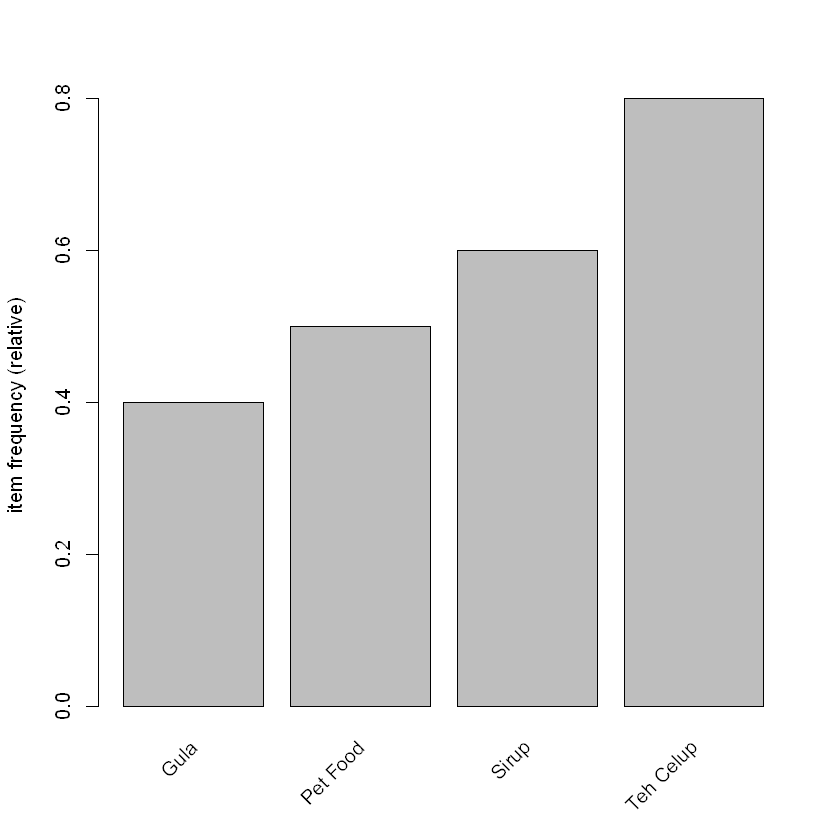

In [14]:
itemFrequencyPlot(transaksi)

## Kesimpulan

Pada bab praktek awal ini, kita telah mengolah data transaksi berupa file teks dengan beberapa langkah penting berikut:

1. Membaca file dataset dengan read.csv dan menganalisa statistik sebaran item dan transaksi secara manual.
2. Membaca kembali file tersebut dengan read.transactions yang menghasilkan objek yang lebih mudah dianalisa di R.
3. Dengan objek yang dihasilkan oleh read.transactions kita dapat menganalisa jumlah item dan transaksi, daftar detil item, daftar detil transaksi, dan juga distribusinya.

# Itemset and Rules

## Pengantar
Pada bab ketiga, "Item, Itemset and Rules" telah dijelaskan dengan gamblang mengenai apa yang dimaksud dengan item, itemset yang terdiri dari beberapa item, dan rules yang menjelaskan hubungan antar itemset yang terdiri dari lhs (left hand side) dan rhs (right hand side).

Kita akan masuk ke inti dari algoritma apriori, yaitu bagaimana menghasilkan dan mengelola kombinasi itemset dan rules yang besar dengan R. Tentunya masih menggunakan dataset sederhana yang sudah kita perkenalkan dari awal.

## Melihat Itemset per Transaksi dengan Inspect
Tiap transaksi terdiri atas beberapa item atau itemset. Pada praktek sebelumnya, kita baru melihat visualisasi dan sebaran matrix dari tiap transaksi namun masih sulit dicerna.

Untuk melihat notasi itemset yang lebih baik dan mudah dimengerti kita bisa menggunakan function **inspect**.

Penggunaan function ini juga sederhana. Seperti terlihat pada contoh berikut dimana kita inspect variable transaksi kita.

    inspect(transaksi)
Tambahkan perintah ini pada code editor - di bawah comment "#Menggunakan inspect terhadap transaksi". Jika berhasil dijalankan, maka akan muncul hasil berikut.
```
     items                      transactionID
[1]  {Pet Food,Sirup,Teh Celup} #01          
[2]  {Gula,Teh Celup}           #02          
[3]  {Pet Food,Sirup}           #03          
[4]  {Sirup,Teh Celup}          #04          
[5]  {Gula,Sirup,Teh Celup}     #05          
[6]  {Pet Food,Teh Celup}       #06          
[7]  {Pet Food,Sirup,Teh Celup} #07          
[8]  {Teh Celup}                #08          
[9]  {Gula,Teh Celup}           #09          
[10] {Gula,Pet Food,Sirup}      #10 
```
Ini merupakan daftar itemset dari sepuluh transaksi kita. Kolom **items** berisi item-item yang terjadi pada transaksi, dan **transactionID** berisi kode transaksi. Sebagai contoh, pada kode transaksi #01 terdapat itemset yang terdiri dari Pet Food, Sirup dan Teh Celup.

Format penulisan tiap itemset terdiri dari notasi kurung kurawal pembuka dan penutup, yang di dalamnya terdapat daftar item yang dipisahkan tanda koma untuk tiap itemnya.

In [16]:
inspect(transaksi)

     items                      transactionID
[1]  {Pet Food,Sirup,Teh Celup} #01          
[2]  {Gula,Teh Celup}           #02          
[3]  {Pet Food,Sirup}           #03          
[4]  {Sirup,Teh Celup}          #04          
[5]  {Gula,Sirup,Teh Celup}     #05          
[6]  {Pet Food,Teh Celup}       #06          
[7]  {Pet Food,Sirup,Teh Celup} #07          
[8]  {Teh Celup}                #08          
[9]  {Gula,Teh Celup}           #09          
[10] {Gula,Pet Food,Sirup}      #10          


## Menghasilkan Rules dengan Apriori
Saatnya kita menghasilkan rule dari transaksi kita. Seperti dijelaskan pada bab tiga, rule adalah formula yang menyatakan kombinasi dari dua itemset. Satu itemset ada di bagian kiri rule (left hand side) dan satunya di bagian kanan (right hand side) dalam format berikut.

    {itemset lhs} => {itemset rhs}
Untuk menghasilkan rule ini, kita gunakan fungsi apriori dengan syntax berikut.

    apriori(transaksi)
Tambahkan perintah ini pada code editor - di bawah comment "#Menghasilkan associaton rules" - dan jalankan. Jika semua berjalan lancar, maka akan muncul hasil berikut.
```
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen maxlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1     10
 target   ext
  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
set of 3 rules 
```
Banyak sekali informasi dari output yang dihasilkan. Namun untuk saat ini, perhatikan baris terakhir dimana tertulis "set of 3 rules". Ini artinya dengan fungsi apriori ini, kita mendapatkan tiga rules. Kita akan ulas lebih jauh mengenai tiga rules ini pada praktek berikutnya.

In [17]:
apriori(transaksi)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.03s].


set of 3 rules 

## Melihat Rules dengan fungsi inspect
Di awal bab, kita bisa melihat daftar transaksi dengan menggunakan fungsi inspect. Selain transaksi, fungsi ini bisa digunakan juga untuk melihat isi dari association rules yang dihasilkan oleh fungsi **apriori**.

Perhatikan pada code editor, hasil eksekusi apriori berupa rules sudah disimpan dalam variable bernama **mba**. Jadi untuk menampilkan isi rules pada variable ini kita gunakan perintah berikut.

    inspect(mba)
Tambahkan perintah tersebut pada code editor - di bagian bawah comment "#Melihat isi dari rules dengan menggunakan fungsi inspect" dan jalankan. Jika berhasil, maka akan muncul hasil sebagai berikut.
```
    lhs                rhs         support confidence lift
[1] {}              => {Teh Celup} 0.8     0.8        1.000000
[2] {Pet Food}      => {Sirup}     0.4     0.8        1.333333
[3] {Gula,Pet Food} => {Sirup}     0.1     1.0        1.666667
```
Terlihat kalau variable **mba** menyimpan tiga rules dengan kolom-kolom berikut:

- **lhs**: itemset di bagian kiri (left hand side)
- **rhs**: itemset di bagian kanan (right hand side)
- **support**, **confidence dan lift**: metrik-metrik yang digunakan untuk menilai kualitas dari rule. Umumnya semakin besar semakin baik. Detil dari metrik-metrik ini akan dibahas pada bab berikutnya.

Kalau fokus kita kembali ke itemset lhs dan rhs untuk product packaging, terlihat rule kedua yaitu **{Pet Food} => {Sirup}** cukup menarik.

Kenapa bisa dikatakan menarik?

Karena support 0.4 menunjukkan bahwa kombinasi ini terdapat di 40 persen poulasi - berarti 4 dari 10 transaksi untuk dataset kita. Nilai lift juga di atas 1, yang artinya rule ini memiliki asosiasi tinggi antar itemset yang terdapat di rule ini.

Sedangkan {} => {Teh Celup} tidak menarik karena hanya berisi satu item. Rule sisanya, {Gula, Peta Food} = > {Sirup} terlalu unik - ini ditunjukkan dengan support 0.1 (10%) yang artinya hanya terdapat di 1 dari 10 transaksi.

Apa makna dari *rule* jika ingin kita aplikasikan?

Artinya ada beberapa opsi *action item* yang bisa kita lakukan:

- rekomendasikan kepada setiap pelanggan yang membeli Pet Food untuk membeli Sirup.
- rak display Pet Food dan Sirup bisa didekatkan.
- Pet Food dan Sirup dipaketkan bersama dan dijual dengan harga khusus.

In [18]:
mba <- apriori(transaksi)
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs         support confidence lift     count
[1] {}              => {Teh Celup} 0.8     0.8        1.000000 8    
[2] {Pet Food}      => {Sirup}     0.4     0.8        1.333333 4    
[3] {Gula,Pet Food} => {Sirup}     0.1     1.0        1.666667 1    


## Filter RHS
Dari hasil inspect objek mba yang bertipe association rules di praktek sebelumnya, kita sekarang mengerti bahwa objek tersebut mengandung banyak informasi termasuk itemset yang terdapat di left hand side dan right hand side.

Ini penting untuk bisnis, misalkan untuk inventory. Kita ingin menjawab, adakah item yang kurang laku sebelumnya ada di dalam itemset dari rules yang dihasilkan oleh apriori? Jika ada, mungkin saya bisa paketkan bersama sehingga kemungkinan besar terjual lebih banyak.

Untuk melakukan ini kita akan melakukan filter atau subsetting dari rules. Banyak cara, salah satunya adalah dengan menggunakan gabungan function **inspect, subset** dan operator **%in%** dengan format berikut.

    inspect(subset(rules, rhs %in% teks_atau_vector_teks_yang_mewakili_item))
Kita langsung contohkan saja dengan kasus kita. Misalkan kita ingin mengambil rules yang kolom rhs-nya mengandung Sirup, maka perintahnya adalah sebagai berikut.

    inspect(subset(mba, rhs %in% "Sirup"))
Ini artinya kita akan filter rules dimana pada rhs memiliki item "Sirup".

Tambahkan code ini pada code editor perintah dan jalankan. Jika berhasil maka rule yang muncul adalah sebagai berikut.
```
    lhs             rhs         support   confidence lift
[1] {Pet Food}      => {Sirup}  0.4       0.8        1.333333
[2] {Gula,Pet Food} => {Sirup}  0.1       1.0        1.666667
```

In [20]:
inspect(subset(mba, rhs %in% "Sirup"))

    lhs                rhs     support confidence lift     count
[1] {Pet Food}      => {Sirup} 0.4     0.8        1.333333 4    
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        1.666667 1    


## Filter LHS
Filter dari praktek sebelumnya hanya berfokus kepada rhs, tentunya bisa juga dengan lhs.

Berikut adalah contoh perintah inspect untuk filter lhs dengan item Gula.

    inspect(subset(mba, lhs %in% "Gula"))

Tugas Praktek

Tambahkan pada code editor perintah untuk melakukan filter objek mba dimana itemset pada sisi lhs memiliki item Gula.

Jika berhasil maka rule yang muncul adalah sebagai berikut. Terlihat disini ada satu rules dimana lhs nya sama-sama memiliki item Sirup.
```
    lhs                rhs     support confidence lift
[1] {Gula,Pet Food} => {Sirup} 0.1     1          1.666667
```

In [21]:
inspect(subset(mba, lhs %in% "Gula"))

    lhs                rhs     support confidence lift     count
[1] {Gula,Pet Food} => {Sirup} 0.1     1          1.666667 1    


## Filter LHS dan RHS
Kedua praktek sebelumnya menerapkan filter pada lhs atau rhs pada suatu waktu. Kita sebenarnya bisa melakukan filter untuk kedua sisi dengan menggunakan operator & untuk AND dan operator | untuk OR.

Berikut adalah contoh perintah inspect untuk filter lhs dengan item Pet Food dan rhs dengan item Sirup.

    inspect(subset(mba, lhs %in% "Pet Food" & rhs %in% "Sirup"))

Tugas Praktek

Tambahkan pada code editor perintah untuk melakukan filter objek mba dimana itemset lhs memiliki item Pet Food dan rhs memiliki item Sirup.

Jika berhasil maka rule yang muncul adalah sebagai berikut.

 ```

    lhs                rhs     support confidence lift
[1] {Pet Food}      => {Sirup} 0.4     0.8        1.333333
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        1.666667
```

In [22]:
inspect(subset(mba, lhs %in% "Pet Food" & rhs %in% "Sirup"))

    lhs                rhs     support confidence lift     count
[1] {Pet Food}      => {Sirup} 0.4     0.8        1.333333 4    
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        1.666667 1    


## Kesimpulan
Pada bab ini kita telah mempelajari apa yang dinamakan itemset dan bagaimana membuat association rules dari itemset menggunakan function apriori.

Selain itu kita juga telah mengetahui bagaimana menganalisa itemset dan rules yang dihasilkan dengan inspect. Serta akhirnya bisa melakukan filter terhadap itemset di lhs maupun rhs dari rules yang dihasilkan.

Walaupun masih banyak hal bisa kita gunakan untuk menghasilkan rules dan juga analisanya. Untuk awal, ini akan menjadi dasar yang sangat baik sebelum kita melangkah ke hal yang lebih kompleks.

# Scoring and Evaluation: Support, Confidence and Lift

## Pengantar
Ketika menggunakan inspect pada bab sebelumnya, kita melihat adanya beberapa informasi metrik yang dapat menentukan seberapa berkualitasnya sebuah rule.
```
    lhs                rhs         support confidence lift
[1] {}              => {Teh Celup} 0.8     0.8        1.000000
[2] {Pet Food}      => {Sirup}     0.4     0.8        1.333333
[3] {Gula,Pet Food} => {Sirup}     0.1     1.0        1.666667
```
Metrik-metrik ini adalah support, confidence dan lift. Apa sebenarnya itu? Kenapa kita harus mengerti dan menggunakannya lebih lanjut?

<video controls src="Belajar Data Science_ Perhitungan Support, Confidence, dan Lift untuk product packaging.mp4">

## Menghasilkan Rules dengan Parameter Support dan Confidence
Pada bab sebelumnya, kita menghasilkan tiga rules dengan function apriori secara default tanpa parameter apapun. Padahal sebenarnya kita bisa memasukkan parameter tambahan berupa support dan confidence.

Tanpa parameter tambahan tersebut, maka nilai minimum support adalah 0.1 dan minimum confidence adalah 0.8 sebagai filter dari function apriori.

Berikut adalah perintah untuk menghasilkan kembali association rules dengan function apriori, tapi kali ini dengan tambahan parameter minimum support dan confidence masing-masing bernilai 0.1 dan 0.5.

    apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

Tugas Praktek

Tambahkan perintah pada code editor untuk menghasilkan rule dengan tingkat support minimum 0.1 dan minimum confidence 0.5.

Hasilnya akan terlihat sebagai berikut.
```
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen maxlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1     10
 target   ext
  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.01s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
set of 16 rules 
```
Perhatikan pada akhir baris output, terdapat 16 rule. Lebih banyak dibandingkan eksekusi perintah apriori sebelumnya yang hanya menghasilkan 3 rule.

In [23]:
apriori(transaksi, parameter = list(supp = 0.1, confidence = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.03s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.02s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.06s].


set of 16 rules 

## Inspeksi Rules Yang Dihasilkan
Dengan pengetahuan kita dari bab sebelumnya, menggunakan function kita bisa menggali informasi detil dari rules dengan inspect.

Tugas Praktek

Tambahkan perintah pada code editor untuk menyimpan association rules ke dalam variable **mba** dan tampilkan isinya dengan function **inspect**.

Jika semua berjalan lancar, hasilnya akan terlihat sebagai berikut. 
```
     lhs                     rhs         support confidence lift      
[1]  {}                   => {Pet Food}  0.5     0.5000000  1.0000000     
[2]  {}                   => {Sirup}     0.6     0.6000000  1.0000000     
[3]  {}                   => {Teh Celup} 0.8     0.8000000  1.0000000     
[4]  {Gula}               => {Sirup}     0.2     0.5000000  0.8333333     
[5]  {Gula}               => {Teh Celup} 0.3     0.7500000  0.9375000     
[6]  {Pet Food}           => {Sirup}     0.4     0.8000000  1.3333333     
[7]  {Sirup}              => {Pet Food}  0.4     0.6666667  1.3333333     
[8]  {Pet Food}           => {Teh Celup} 0.3     0.6000000  0.7500000     
[9]  {Sirup}              => {Teh Celup} 0.4     0.6666667  0.8333333     
[10] {Teh Celup}          => {Sirup}     0.4     0.5000000  0.8333333     
[11] {Gula,Pet Food}      => {Sirup}     0.1     1.0000000  1.6666667     
[12] {Gula,Sirup}         => {Pet Food}  0.1     0.5000000  1.0000000     
[13] {Gula,Sirup}         => {Teh Celup} 0.1     0.5000000  0.6250000     
[14] {Pet Food,Sirup}     => {Teh Celup} 0.2     0.5000000  0.6250000     
[15] {Pet Food,Teh Celup} => {Sirup}     0.2     0.6666667  1.1111111     
[16] {Sirup,Teh Celup}    => {Pet Food}  0.2     0.5000000  1.0000000 
```
Terlihat dengan merubah parameter pada function apriori, kita mendapatkan jumlah rules yang berbeda.

In [24]:
mba <- apriori(transaksi, parameter = list(supp = 0.1, confidence = 0.5))
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs         support confidence lift      count
[1]  {}                   => {Pet Food}  0.5     0.5000000  1.0000000 5    
[2]  {}                   => {Sirup}     0.6     0.6000000  1.0000000 6    
[3]  {}                   => {Teh Celup} 0.8     0.8000000  1.000

## Filter LHS dan RHS (2)
Dengan 16 rules yang dihasilkan, kita bisa memiliki lebih banyak pilihan untuk melakukan filter lhs dan rhs seperti yang telah ditunjukkan pada bab Itemset and Rules.

Berikut adalah contoh untuk filter dimana lhs atau rhs keduanya memiliki item Teh Celup.

    subset(mba, lhs %in% "Teh Celup" | rhs %in% "Teh Celup")

 

Tugas Praktek

Tambahkan perintah pada code editor menampilkan rules yang telah difilter berdasarkan lhs atau rhs yang memiliki item Teh Celup.

Hasilnya akan terlihat sebagai berikut.

  
```
    lhs                     rhs         support confidence lift      
[1] {}                   => {Teh Celup} 0.8     0.8000000  1.0000000    
[2] {Gula}               => {Teh Celup} 0.3     0.7500000  0.9375000    
[3] {Pet Food}           => {Teh Celup} 0.3     0.6000000  0.7500000    
[4] {Sirup}              => {Teh Celup} 0.4     0.6666667  0.8333333    
[5] {Teh Celup}          => {Sirup}     0.4     0.5000000  0.8333333    
[6] {Gula,Sirup}         => {Teh Celup} 0.1     0.5000000  0.6250000    
[7] {Pet Food,Sirup}     => {Teh Celup} 0.2     0.5000000  0.6250000    
[8] {Pet Food,Teh Celup} => {Sirup}     0.2     0.6666667  1.1111111    
[9] {Sirup,Teh Celup}    => {Pet Food}  0.2     0.5000000  1.0000000
``` 

Terdapat 9 rule sebagai hasil filter dan jika kita gunakan informasi support, confidence dan lift… maka kandidat yang bagus mungkin hanya rule ke 8 dimana nilai lift lebih dari 1 ({Pet Food, Teh Celup} => {Sirup}).

Pada praktek selanjutnya kita akan melakukan filter berdasarkan nilai lift dan support.

In [25]:
inspect(subset(mba, lhs %in% "Teh Celup" | rhs %in% "Teh Celup"))

    lhs                     rhs         support confidence lift      count
[1] {}                   => {Teh Celup} 0.8     0.8000000  1.0000000 8    
[2] {Gula}               => {Teh Celup} 0.3     0.7500000  0.9375000 3    
[3] {Pet Food}           => {Teh Celup} 0.3     0.6000000  0.7500000 3    
[4] {Sirup}              => {Teh Celup} 0.4     0.6666667  0.8333333 4    
[5] {Teh Celup}          => {Sirup}     0.4     0.5000000  0.8333333 4    
[6] {Gula,Sirup}         => {Teh Celup} 0.1     0.5000000  0.6250000 1    
[7] {Pet Food,Sirup}     => {Teh Celup} 0.2     0.5000000  0.6250000 2    
[8] {Pet Food,Teh Celup} => {Sirup}     0.2     0.6666667  1.1111111 2    
[9] {Sirup,Teh Celup}    => {Pet Food}  0.2     0.5000000  1.0000000 2    


## Filter berdasarkan Lift
Kita bisa melakukan filter terhadap metrik kualitas dari association rules: support, confidence dan lift dengan function subset. Function yang sama untuk melakukan filter terhadap lhs dan rhs.

Bedanya adalah karena angka, maka untuk ketiga metrik tersebut kita gunakan operator perbandingan angka.

Sebagai contoh, untuk melakukan filter terhadap objek **mba** dengan kondisi berikut:

- lhs atau rhs memiliki Teh Celup
- lift di atas 1

maka perintahnya adalah sebagai berikut

    subset(mba, (lhs %in% "Teh Celup" | rhs %in% "Teh Celup") & lift>1)

Perhatikan untuk ekspresi lhs dan rhs ditutup dengan kurung sebelum digabungkan dengan kondisi lift.

Tugas Praktek

Tambahkan perintah pada code editor untuk melakukan filter dimana lhs atau rhs memiliki item Teh Celup.

Hasilnya akan terlihat sebagai berikut.  
```
     lhs                     rhs     support confidence lift   
[1] {Pet Food,Teh Celup} => {Sirup} 0.2     0.6666667  1.111111 
```
Hanya terdapat 1 rule sebagai hasil filter dan paket produk ini cukup menjanjikan, dimana Teh Celup menjadi komponen dari itemset di lhs.

In [26]:
inspect(subset(mba, (lhs %in% "Teh Celup" | rhs %in% "Teh Celup") & lift>1))

    lhs                     rhs     support confidence lift     count
[1] {Pet Food,Teh Celup} => {Sirup} 0.2     0.6666667  1.111111 2    


## Rekomendasi - Filter dengan %ain%
Operator %in% yang sebelumnya kita gunakan sudah efektif. Namun operator ini tidak cocok jika kita ingin melakukan filter itemset dengan logika AND. Artinya seluruh item harus muncul dalam itemset yang terpilih. Untuk keperluan tersebut, gunakan operator %ain%.

Contoh subset yang menggunakan %ain% adalah sebagai berikut.

    subset(mba, (lhs %ain% c("Pet Food", "Gula" )))

Dan ekspresi inilah menjadi kunci untuk membuat rekomendasi.

Tugas Praktek

Tambahkan perintah pada code editor untuk melakukan filter dimana lhs memiliki item Gula dan Pet Food.

Hasilnya akan terlihat sebagai berikut.   
```
    lhs                rhs     support confidence lift
[1] {Gula,Pet Food} => {Sirup} 0.1     1          1.666667
```
Hanya terdapat 1 rule sebagai hasil filter, dan dengan lift di atas 1 dan support 0.1 (10%) rule ini bisa dianggap layak untuk meghasilkan rekomendasi item, yaitu Sirup.

Jadi orang yang membeli Gula dan Pet Food, bisa ditawarin Sirup.

In [28]:
inspect(subset(mba, (lhs %ain% c("Pet Food", "Gula" ))))

    lhs                rhs     support confidence lift     count
[1] {Gula,Pet Food} => {Sirup} 0.1     1          1.666667 1    


## Visualisasi Rules dengan Graph
Sejauh ini Anda telah menghasilkan rules dan mengerti bagaimana metrik kualitas dapat digunakan sebagai basis pemilihan rule.

Namun ketika item semakin banyak, maka proses memilih berdasarkan angka-angka saja cukup merepotkan. Kadangkala visualisasi bisa sangat membantu analisa di proses ini.

Jenis visualisasi cukup banyak, namun kita akan gunakan visualisasi bertipe graph yang terdapat pada package arulesViz – suatu package dengan visualisasi khusus untuk association rules.

Berikut adalah contoh visualisasi yang kita hasilkan dari rules yang telah kita filter dengan lift di atas nilai 1.1.

<img src='vis.png'>

Lingkaran disini adalah titik pertemuan (asosiasi) dari item-item yang ada, dimana terdapat tanda panah sebagai garis penghubungnya. Tiap Item disini berupa teks.

Besarnya bulatan menunjukkan popularitas, dan intensitas warna menunjukkan lift. Terlihat disini Gula ke Sirup, dan Pet Food ke Sirup memiliki lift yang relatif tinggi tapi supportnya tidak terlalu besar.

Tugas Praktek

Grafik di atas dihasilkan oleh perintah berikut.

    plot(subset(mba, lift>1.1), method="graph")

Perhatikan fungsi plot ini merupakan pengembangan dari package arules. Method graph menunjukkan bahwa plot ini harus menghasilkan visualisasi dengan tipe jaringan.

Ketiklah perintah di atas di code editor dan jalan

In [ ]:
install.packages("arulesViz")

also installing the dependencies 'gridExtra', 'bitops', 'viridis', 'gtools', 'gdata', 'caTools', 'lmtest', 'TSP', 'qap', 'gclus', 'dendextend', 'gplots', 'registry', 'scatterplot3d', 'vcd', 'seriation', 'igraph', 'DT', 'visNetwork'



In [ ]:
library(arulesViz)

# Penutup

## Kesimpulan
Dengan rangkaian praktek yang telah kita lakukan sejauh ini, Anda telah menyelesaikan dasar penggunaan algoritma apriori untuk membantu di bidang retail.

Sepanjang course ini kita telah mendapatkan beberapa keterampilan hal berikut:

- persiapan data transaksi, dengan membaca file dalam bentuk csv dalam format data.frame dan transaction.
- menganalisa statistik yang terkait dengan item dan itemset.
- menghasilkan rule dan mencari itemset terbaik di rule - ini menjadi model untuk paket produk yang baik.

Tiga keterampilan penting ini siap menjadi modal Anda sebagai data scientist untuk berkontribusi meningkatkan omset penjualan di perusahaan ritel.

## What Next?
Seluruh praktek yang dilakukan pada bab ini masih dalam lingkup yang sederhana. Package arules sendiri memiliki banyak function yang bisa kita gunakan agar solusi Market Basket Analysis untuk product packaging, rekomendasi produk dan mengatur produk stok menjadi lebih tajam.

Untuk selanjutnya, kita akan memperdalam topik penggunaan apriori dan function-function dari package arules yang sangat kaya fungsi ini dalam bentuk latihan yang telah tersedia di bagian project.  Klik tombol Next untuk menyelesaikan course dan mendapatkan sertfikat Anda.

<img src='g2.jpg'>